Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free under certain conditions — see the [`license`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
all_result = pd.read_csv('set-covering_showdown.csv')


def dominate(a, b):
    return a.Calls < b.Calls and a.Cost <= b.Cost or a.Calls <= b.Calls and a.Cost < b.Cost

In [14]:
INSTANCE = 4
data = all_result[['Algorithm', 'Author', f'Calls I{INSTANCE}', f'Cost I{INSTANCE}']].rename(
    columns={f'Calls I{INSTANCE}': 'Calls', f'Cost I{INSTANCE}': 'Cost'}
)
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)
data.dropna(inplace=True)
data.Calls = data.Calls.astype(int)
data.Cost = data.Cost.astype(float)
data = data[(data.Calls > 0) & (data.Cost > 0)]
all_tuples = list(data.itertuples(index=None))

<Axes: xlabel='Calls', ylabel='Cost'>

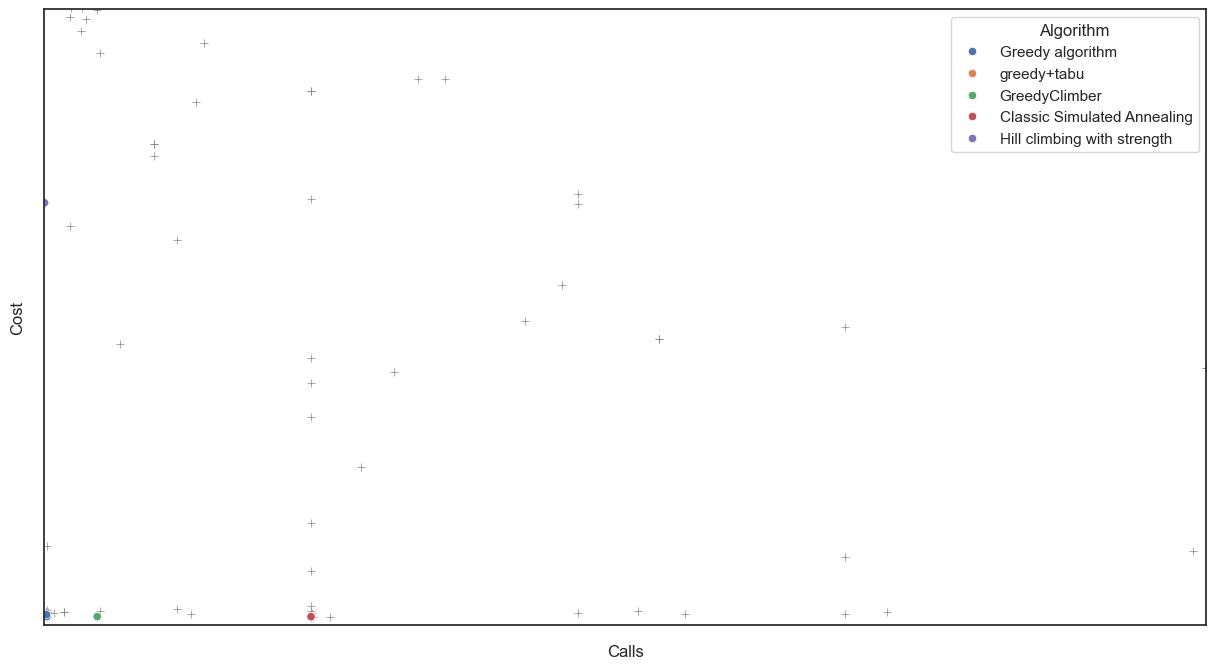

In [23]:
sns.set_theme(style='white', rc={'figure.figsize': (15, 8)})
ax = sns.scatterplot(data=data, x='Calls', y='Cost', c='gray', marker='+')
ax.set(xticklabels=[], yticklabels=[])
ax.set_xlim(
    [
        0,
        np.percentile([d.Calls for d in all_tuples], 80),
    ]
)
ax.set_ylim(
    [
        0,
        np.percentile([d.Cost for d in all_tuples], 80),
    ]
)

pareto_front = pd.DataFrame([d for d in all_tuples if not any(dominate(_, d) for _ in all_tuples)])
sns.scatterplot(data=pareto_front, x='Calls', y='Cost', hue='Algorithm', ax=ax)